In [33]:
import random
import numpy

from pyspark import SparkContext
from pyspark.mllib.random import RandomRDDs
from matplotlib import pyplot as plt
# constants
MIN_MEAN_VALUE = 0
MAX_MEAN_VALUE = 100
STEPS = 0.1


In [34]:
# methods

def noise_values(values):
    result = ""
    cluster = random.randint(0, count_cluster - 1)
    for v in values:
        if not result:
            result = str(v)
        else:
            result = result + "," + str(v)
    return (result + "," + str(cluster))


In [35]:

def point_values(means_value, normal_value, std, cluster, dimension):
    values = ""
    for d in range(dimension):
        value = means_value[d] + normal_value[d] * std
        if not values:
            values = str(value)
        else:
            values = values + "," + str(value)
    return (values + "," + str(cluster))


In [36]:
def write_into_csv(file_name, rdd): 
    with open(file_name,'wb') as file:
        for row in rdd.collect():
            file.write(row.encode())
            file.write('\n'.encode())

In [37]:
# inputs
file_name = "out" + '.csv'  # file name to be generated
points = 100 # number of points to be generated
count_cluster = 3 # number of clusters
dimension = 2 # dimension of the data
std = 1 # standard deviation
noise_points = points * 2 # number of noise points to be generated / double the number of points
file_name_noise ='out-noise.csv' # file name for noise points to be generated

sc = SparkContext("local", "generator_noise") # spark context

In [38]:
# array of the clusters : clusters = [0, 1, 2]
clusters = sc.parallelize(range(0, count_cluster))

In [39]:
# random means of each cluster : means_cluster = [ (0, [0.6, 80.9]), (1, [57.8, 20.2]), (2, [15.6, 49.9]) ]
lst = list(numpy.arange(MIN_MEAN_VALUE, MAX_MEAN_VALUE, STEPS))
means_cluster = clusters.map(lambda cluster : (cluster, random.sample(lst, dimension)))

In [40]:
# creating random vector using normalVectorRDD 
random_values_vector = RandomRDDs.normalVectorRDD(sc, numRows = points, numCols = dimension, numPartitions = count_cluster, seed = 1)

In [41]:
# assiging a random cluster for each point
cluster_normal_values_vector = random_values_vector.map(lambda point : (random.randint(0, count_cluster - 1), point.tolist()))

In [42]:
# generate a value depending of the mean of the cluster, standard deviation and the normal value 
points_value_vector = cluster_normal_values_vector.join(means_cluster).map(lambda x: point_values(x[1][0], x[1][1], std, x[0], dimension))

points_value_vector.collect()

['18.982557706990587,77.41884588881092,0',
 '18.97948112599579,76.29339613980851,0',
 '19.549957379738427,78.03067513984921,0',
 '19.741089697666634,78.85085460500854,0',
 '19.2589199344712,78.74058103916168,0',
 '18.315315262416334,78.21529332796653,0',
 '17.60037166572348,78.39743326280343,0',
 '18.704120745061044,76.95692543558619,0',
 '19.18113388847761,76.46312426011293,0',
 '18.438188913711155,78.72927253391347,0',
 '19.37093879179435,78.0588675730413,0',
 '17.312954745746737,77.84957921909886,0',
 '18.9871049137793,78.54630126537145,0',
 '19.13121760217024,78.80740512538164,0',
 '17.63156622722753,79.28540866114393,0',
 '19.32384241785171,77.96246896246141,0',
 '18.994529746124403,77.9842188816221,0',
 '18.98922636293676,79.20364956910153,0',
 '19.827528047656276,76.76699809155872,0',
 '19.390094773873074,78.5956889648101,0',
 '19.1452805961785,77.35690380341327,0',
 '19.933830873513415,77.5042112175734,0',
 '18.14710209390685,77.40031943415053,0',
 '19.359856635021398,79.112215

In [43]:
# generate random points that represent noise points
lst = list(numpy.arange(MIN_MEAN_VALUE, MAX_MEAN_VALUE, STEPS))
noise_points_vector = sc.parallelize(range(0, noise_points)).map(lambda x : random.sample(lst, dimension)).map(lambda v: noise_values(v))
        
# noise_points_vector = noise_points_vector.map(lambda row : str(row).replace("[", "").replace("]",""))
noise_points_vector.collect()

['46.800000000000004,0.4,1',
 '89.60000000000001,0.4,1',
 '21.3,26.3,0',
 '75.3,1.0,0',
 '4.2,37.2,1',
 '9.3,44.300000000000004,1',
 '97.5,4.4,1',
 '92.0,45.5,1',
 '36.0,84.30000000000001,1',
 '85.60000000000001,30.1,0',
 '28.6,88.10000000000001,2',
 '33.800000000000004,4.1000000000000005,0',
 '70.0,77.80000000000001,0',
 '77.4,89.80000000000001,2',
 '82.60000000000001,97.5,0',
 '52.1,36.0,2',
 '83.7,97.10000000000001,0',
 '73.5,64.7,1',
 '26.5,21.1,1',
 '7.4,7.9,2',
 '6.1000000000000005,3.5,2',
 '80.80000000000001,43.300000000000004,2',
 '71.4,79.60000000000001,1',
 '50.6,58.400000000000006,0',
 '88.0,92.2,2',
 '25.0,39.300000000000004,2',
 '6.6000000000000005,0.8,0',
 '47.800000000000004,8.9,2',
 '70.9,0.4,0',
 '38.6,67.3,1',
 '17.1,57.400000000000006,0',
 '39.0,20.900000000000002,2',
 '75.2,81.2,0',
 '33.4,11.100000000000001,2',
 '23.6,62.7,0',
 '3.4000000000000004,11.600000000000001,0',
 '64.5,34.2,2',
 '3.2,29.700000000000003,1',
 '32.1,32.4,2',
 '59.6,69.0,1',
 '18.6,47.7,2',
 '8

In [44]:
data = points_value_vector.union(noise_points_vector)

data.collect()

['18.982557706990587,77.41884588881092,0',
 '18.97948112599579,76.29339613980851,0',
 '19.549957379738427,78.03067513984921,0',
 '19.741089697666634,78.85085460500854,0',
 '19.2589199344712,78.74058103916168,0',
 '18.315315262416334,78.21529332796653,0',
 '17.60037166572348,78.39743326280343,0',
 '18.704120745061044,76.95692543558619,0',
 '19.18113388847761,76.46312426011293,0',
 '18.438188913711155,78.72927253391347,0',
 '19.37093879179435,78.0588675730413,0',
 '17.312954745746737,77.84957921909886,0',
 '18.9871049137793,78.54630126537145,0',
 '19.13121760217024,78.80740512538164,0',
 '17.63156622722753,79.28540866114393,0',
 '19.32384241785171,77.96246896246141,0',
 '18.994529746124403,77.9842188816221,0',
 '18.98922636293676,79.20364956910153,0',
 '19.827528047656276,76.76699809155872,0',
 '19.390094773873074,78.5956889648101,0',
 '19.1452805961785,77.35690380341327,0',
 '19.933830873513415,77.5042112175734,0',
 '18.14710209390685,77.40031943415053,0',
 '19.359856635021398,79.112215

In [45]:
# writing points value in a 1 csv file
write_into_csv(file_name, points_value_vector);

# saving noise points generated into a file
write_into_csv(file_name_noise, noise_points_vector);

In [46]:
X = points_value_vector.collect()
type(X)

list

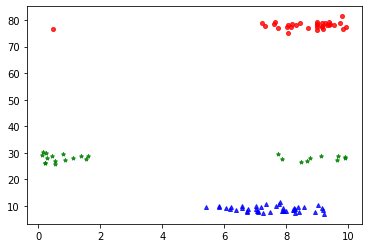

In [47]:
colors = ['ro', 'b^', 'g*']
for x in X:
    lst = x[1:].split(',')
    plt.plot(float(lst[0]), float(lst[1]), colors[int(lst[2])], markersize=4, alpha=0.8)

In [32]:
sc.stop()